In [1]:
"""
Ce projet vise à réaliser une étude de marché afin de dégager les différents clusters à cibler selon le produit étudié.


"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  importation des fonctions pour l’ACP
from functions import *

data = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
data

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [2]:
# sélection de la catégorie à étudier

data = data[data["Produit"].str.contains("Volaille")]
data

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [3]:
# premier filtre des variables

test = data.iloc[:, [3, 5, 10, 11]]
test.head(20)

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Milliers de tonnes,2.00
656,Afghanistan,Résidus,Milliers de tonnes,0.00
657,Afghanistan,Nourriture,Milliers de tonnes,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,kg,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.54


In [4]:
# filtrage des variables par mot-clé

save = test[test["Élément"].str.contains("personne") == False]
save = save.drop("Unité", axis = 1)
save.head(20)

,Zone,Élément,Valeur
651,Afghanistan,Production,28.0
652,Afghanistan,Importations - Quantité,29.0
653,Afghanistan,Variation de stock,0.0
654,Afghanistan,Disponibilité intérieure,57.0
655,Afghanistan,Pertes,2.0
656,Afghanistan,Résidus,0.0
657,Afghanistan,Nourriture,55.0
1704,Afrique du Sud,Production,1667.0
1705,Afrique du Sud,Importations - Quantité,514.0
1706,Afrique du Sud,Variation de stock,-0.0


In [5]:
# génération d’une nouvelle table plus lisible

newdata = pd.DataFrame()
newdata["Zone"] = save["Zone"].unique()
newdata = newdata.set_index("Zone")

for i in range(len(save)):
    test = save.iloc[i, :]
    newdata.loc[test[0], test[1]] = test[2]
        
display(newdata)
newdata.info()

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture,Exportations - Quantité,Alimentation pour touristes,Traitement,Autres utilisations (non alimentaire),Aliments pour animaux,Semences
Zone,,,,,,,,,,,,,
Afghanistan,28.0,29.0,0.0,57.0,2.0,0.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
Afrique du Sud,1667.0,514.0,-0.0,2118.0,83.0,0.0,2035.0,63.0,0.0,NaN,NaN,NaN,NaN
Albanie,13.0,38.0,4.0,47.0,NaN,0.0,47.0,0.0,NaN,NaN,NaN,NaN,NaN
Algérie,275.0,2.0,0.0,277.0,13.0,0.0,264.0,0.0,0.0,NaN,NaN,NaN,NaN
Allemagne,1514.0,842.0,-29.0,1739.0,NaN,-38.0,1609.0,646.0,NaN,167.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),600.0,25.0,-1.0,626.0,30.0,0.0,596.0,0.0,0.0,NaN,NaN,NaN,NaN
Viet Nam,918.0,291.0,2.0,1206.0,39.0,0.0,1166.0,1.0,0.0,NaN,NaN,NaN,NaN
Yémen,168.0,78.0,-0.0,246.0,8.0,NaN,237.0,0.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Zimbabwe
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Production                             168 non-null    float64
 1   Importations - Quantité                170 non-null    float64
 2   Variation de stock                     169 non-null    float64
 3   Disponibilité intérieure               170 non-null    float64
 4   Pertes                                 67 non-null     float64
 5   Résidus                                164 non-null    float64
 6   Nourriture                             170 non-null    float64
 7   Exportations - Quantité                135 non-null    float64
 8   Alimentation pour touristes            78 non-null     float64
 9   Traitement                             46 non-null     float64
 10  Autres utilisations (non alimentaire)  34 non-null     float64
 

In [6]:
# élimination des variables comportant trop de valeurs manquantes dans une nouvelle table

cleandata = newdata.iloc[:, [i for i in range(0, 7)]].copy(deep = True)

display(cleandata)
cleandata.info()

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture
Zone,,,,,,,
Afghanistan,28.0,29.0,0.0,57.0,2.0,0.0,55.0
Afrique du Sud,1667.0,514.0,-0.0,2118.0,83.0,0.0,2035.0
Albanie,13.0,38.0,4.0,47.0,NaN,0.0,47.0
Algérie,275.0,2.0,0.0,277.0,13.0,0.0,264.0
Allemagne,1514.0,842.0,-29.0,1739.0,NaN,-38.0,1609.0
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),600.0,25.0,-1.0,626.0,30.0,0.0,596.0
Viet Nam,918.0,291.0,2.0,1206.0,39.0,0.0,1166.0
Yémen,168.0,78.0,-0.0,246.0,8.0,NaN,237.0


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Production                168 non-null    float64
 1   Importations - Quantité   170 non-null    float64
 2   Variation de stock        169 non-null    float64
 3   Disponibilité intérieure  170 non-null    float64
 4   Pertes                    67 non-null     float64
 5   Résidus                   164 non-null    float64
 6   Nourriture                170 non-null    float64
dtypes: float64(7)
memory usage: 14.7+ KB


In [7]:
# remplacement des NaN par la moyenne pour chaque variable

for att in cleandata.columns:
    a = cleandata.loc[:, att].mean()
    cleandata.loc[:, att] = cleandata.loc[:, att].replace(np.nan, a)
    
display(cleandata)
cleandata.info()

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture
Zone,,,,,,,
Afghanistan,28.0,29.0,0.0,57.0,2.00000,0.000000,55.0
Afrique du Sud,1667.0,514.0,-0.0,2118.0,83.00000,0.000000,2035.0
Albanie,13.0,38.0,4.0,47.0,43.58209,0.000000,47.0
Algérie,275.0,2.0,0.0,277.0,13.00000,0.000000,264.0
Allemagne,1514.0,842.0,-29.0,1739.0,43.58209,-38.000000,1609.0
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),600.0,25.0,-1.0,626.0,30.00000,0.000000,596.0
Viet Nam,918.0,291.0,2.0,1206.0,39.00000,0.000000,1166.0
Yémen,168.0,78.0,-0.0,246.0,8.00000,-2.835366,237.0


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Production                170 non-null    float64
 1   Importations - Quantité   170 non-null    float64
 2   Variation de stock        170 non-null    float64
 3   Disponibilité intérieure  170 non-null    float64
 4   Pertes                    170 non-null    float64
 5   Résidus                   170 non-null    float64
 6   Nourriture                170 non-null    float64
dtypes: float64(7)
memory usage: 14.7+ KB


In [8]:
# données centrées réduites

from sklearn import decomposition
from sklearn import preprocessing

X = cleandata.values
names = cleandata.index
features = cleandata.columns

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

X_scaled_table = cleandata.copy(deep = True)

for i in range(len(X_scaled)):
    X_scaled_table.loc[X_scaled_table.index[i]] = X_scaled[i]

X_scaled_table

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture
Zone,,,,,,,
Afghanistan,-0.281206,-0.325217,-0.182443,-0.289165,-0.552363,0.213231,-0.282618
Afrique du Sud,0.379871,2.280627,-0.182443,0.655926,0.523614,0.213231,0.646850
Albanie,-0.287256,-0.276861,-0.129052,-0.293750,0.000000,0.213231,-0.286373
Algérie,-0.181581,-0.470284,-0.182443,-0.188282,-0.406242,0.213231,-0.184507
Allemagne,0.318160,4.042929,-0.569521,0.482132,0.000000,-2.644518,0.446873
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.050495,-0.346708,-0.195790,-0.028245,-0.180420,0.213231,-0.028657
Viet Nam,0.077768,1.082476,-0.155747,0.237720,-0.060867,0.213231,0.238917
Yémen,-0.224738,-0.061946,-0.182443,-0.202497,-0.472661,0.000000,-0.197182


In [9]:
# établissement de la table des corrélations entre les variables 

corr_table = X_scaled_table.corr(method = "pearson")
corr_table

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture
Production,1.000000,0.192935,0.066443,0.987461,0.452723,-0.021536,0.988787
Importations - Quantité,0.192935,1.000000,0.302510,0.262413,0.153711,-0.413447,0.261816
Variation de stock,0.066443,0.302510,1.000000,0.055941,-0.103700,-0.001994,0.058913
Disponibilité intérieure,0.987461,0.262413,0.055941,1.000000,0.520411,-0.001716,0.998720
Pertes,0.452723,0.153711,-0.103700,0.520411,1.000000,0.008391,0.488509
Résidus,-0.021536,-0.413447,-0.001994,-0.001716,0.008391,1.000000,-0.004711
Nourriture,0.988787,0.261816,0.058913,0.998720,0.488509,-0.004711,1.000000


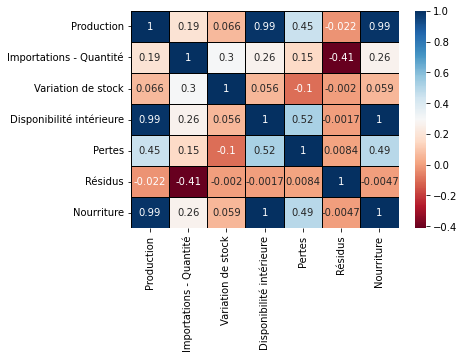

In [10]:
# heatmap des corrélations des variables 

g = sns.heatmap(data = corr_table, 
            cmap = "RdBu", 
            annot = True, 
            linewidth = 1, 
            linecolor = "black")

fig = g.get_figure()

fig.savefig("heatmap.png")

In [11]:
n_comp = 7

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=7)

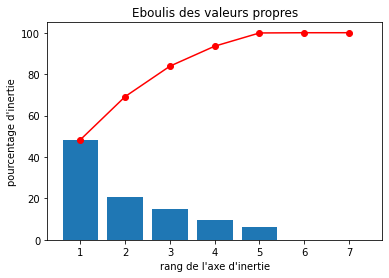

In [12]:
# graphique éboulis des valeurs propres

%matplotlib inline

display_scree_plot(pca)

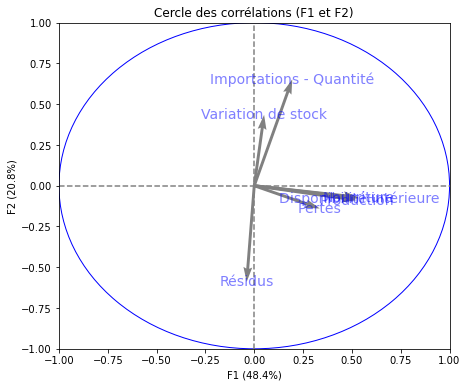

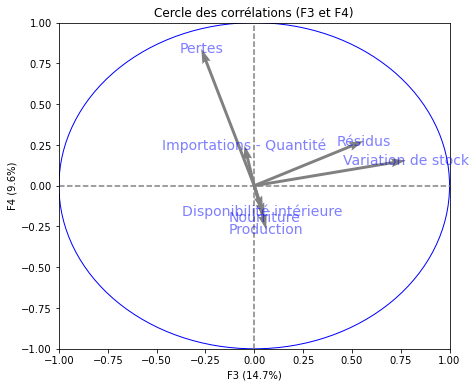

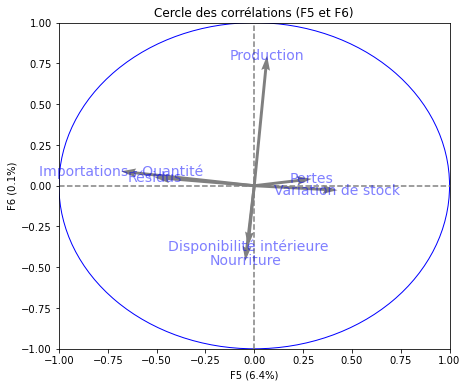

In [13]:
# cercle des corrélations

pcs = pca.components_

plan = [(0,1),(2,3),(4,5)]

display_circles(pcs, n_comp, pca, plan, labels = np.array(features))

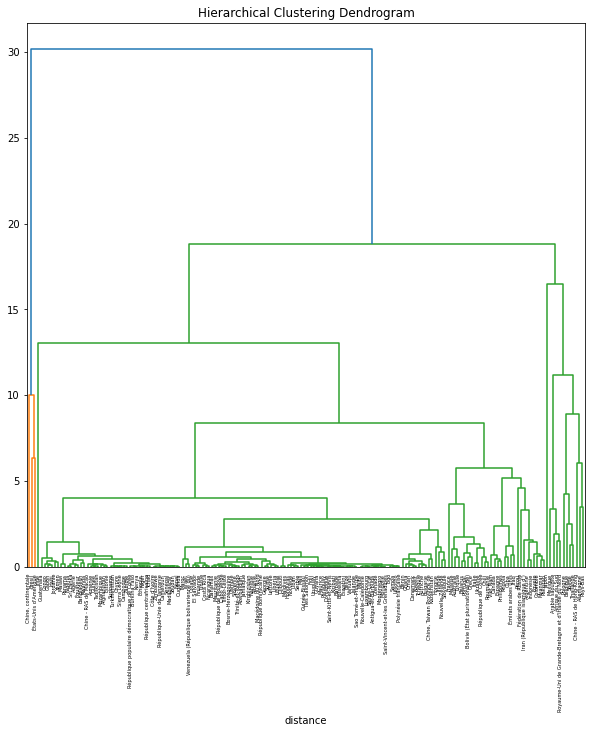

In [14]:
#  Classification Hiérarchique Ascendante

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def plot_dendrogram():
    
    Z = linkage(X_scaled, "ward")
    
    plt.figure(figsize=(10, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels=names,
        orientation="top",
    )
    plt.show()

plot_dendrogram()

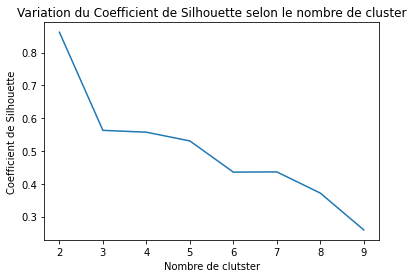

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots()

x = []
y = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i).fit(cleandata)
    score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
    x.append(i)
    y.append(score)

plt.title("Variation du Coefficient de Silhouette selon le nombre de cluster")    
ax.set_xlabel("Nombre de clutster")
ax.set_ylabel("Coefficient de Silhouette")
    
plt.plot(x, y)

plt.show() 

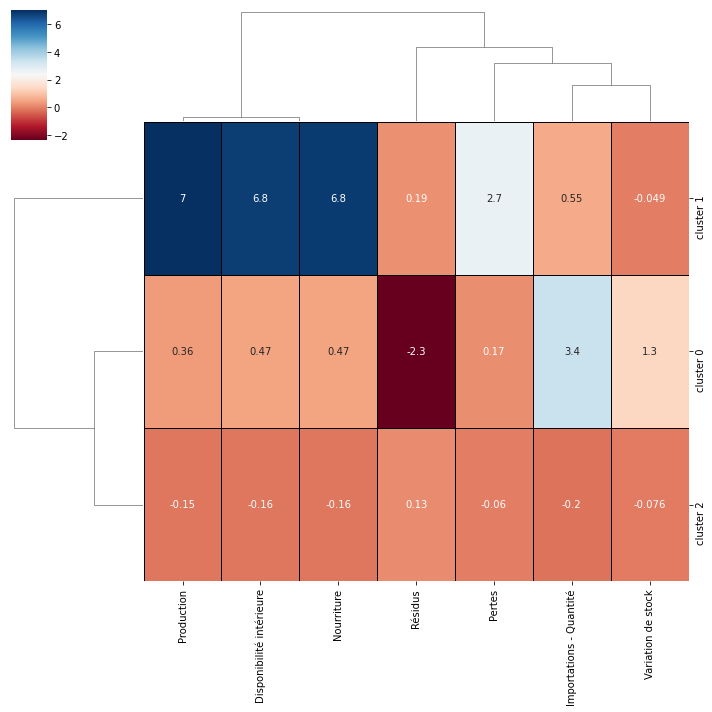

In [16]:
# présentation des résultats du kmeans

def heatmap_kmeans(i):
    kmeans = KMeans(n_clusters=i).fit(X_scaled_table)
    
    string = "cluster "
    
    g = sns.clustermap(kmeans.cluster_centers_, 
                   cmap = "RdBu",
                   xticklabels = list(X_scaled_table.columns),
                   yticklabels = [string+str(i) for i in range(i)],
                   annot = True, 
                   linewidth = 1, 
                   linecolor = "black")

heatmap_kmeans(3)

In [17]:
# affichage des clusters dans les tables

kmeans = KMeans(n_clusters=3).fit(X_scaled_table)
end_table = X_scaled_table.copy(deep = True)
end_table.loc[:, 'cluster_id'] = kmeans.labels_

def sort_countries_by_cluster(cluster_list = set(end_table.cluster_id),
                 col = X_scaled_table.columns, 
                 order = [True, False]):  
    for cluster in cluster_list:
        display(end_table[end_table["cluster_id"]==cluster])

sort_countries_by_cluster()

,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture,cluster_id
Zone,,,,,,,,
Afghanistan,-0.281206,-0.325217,-0.182443,-0.289165,-0.552363,0.213231,-0.282618,0
Afrique du Sud,0.379871,2.280627,-0.182443,0.655926,0.523614,0.213231,0.646850,0
Albanie,-0.287256,-0.276861,-0.129052,-0.293750,0.000000,0.213231,-0.286373,0
Algérie,-0.181581,-0.470284,-0.182443,-0.188282,-0.406242,0.213231,-0.184507,0
Angola,-0.275559,1.007256,-0.182443,-0.169022,-0.552363,0.213231,-0.160566,0
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.050495,-0.346708,-0.195790,-0.028245,-0.180420,0.213231,-0.028657,0
Viet Nam,0.077768,1.082476,-0.155747,0.237720,-0.060867,0.213231,0.238917,0
Yémen,-0.224738,-0.061946,-0.182443,-0.202497,-0.472661,0.000000,-0.197182,0


,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture,cluster_id
Zone,,,,,,,,
Brésil,5.435356,-0.464912,-0.182443,4.262038,0.000000,0.213231,4.377393,1
"Chine, continentale",7.062840,1.947509,-0.849819,8.012595,7.962467,0.138027,7.915002,1
États-Unis d'Amérique,8.546331,0.179833,0.885360,8.060744,0.000000,0.213231,8.188209,1


,Production,Importations - Quantité,Variation de stock,Disponibilité intérieure,Pertes,Résidus,Nourriture,cluster_id
Zone,,,,,,,,
Allemagne,0.318160,4.042929,-0.569521,0.482132,0.000000,-2.644518,0.446873,2
Arabie saoudite,-0.044041,3.398185,-1.623975,0.342730,0.000000,0.213231,0.365193,2
Chine - RAS de Hong-Kong,-0.282819,4.392166,-0.342613,-0.186906,0.000000,-9.187258,-0.124890,2
France,0.413348,2.237644,2.260155,0.406011,0.000000,0.062823,0.388664,2
Japon,0.600902,5.262572,11.283083,0.792118,0.164955,0.213231,0.798944,2
Mexique,1.017958,4.741403,-0.262528,1.619360,1.559740,0.000000,1.596502,2
Pays-Bas,0.151176,2.785677,-1.276940,-0.144719,0.000000,-5.652674,-0.146014,2
Pologne,0.655757,-0.185522,2.820751,0.214792,-0.220271,-4.223800,0.231406,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,0.439162,3.704438,-0.182443,0.709119,0.000000,0.213231,0.691915,2


C:\Users\arche\AppData\Local\Temp\ipykernel_29364\2604397380.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


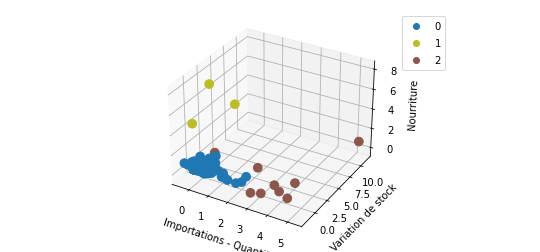

In [18]:
# relancer le noyau kernel permet de résoudre les potentiels soucis d’affichage de cette cellule lors de l’ouverture du notebook 

from matplotlib.colors import ListedColormap

%matplotlib widget

def plot_3D_cluster(a = "Importations - Quantité",\
                    b = "Variation de stock",\
                    c = "Nourriture"):

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    x = end_table[a]
    y = end_table[b]
    z = end_table[c]
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    cmap = ListedColormap(sns.color_palette("tab10", 256).as_hex())

    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_zlabel(c)

    sc = ax.scatter(x, y, z, s=75, c=end_table["cluster_id"], marker='o', cmap=cmap, alpha=1)
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()
    
plot_3D_cluster()